<h1>Apple Revenue</h1>

Goal: The goal of this project is to analyze trends in Apple's revenue over the years.

Essential Questions:
- How has Apple's quarterly revenue behaved in the last 4 quarters?
- How does this behavior compare with Microsoft and Google?
- How does "fear vs greed" mentality correlate with Apple's stock price?


In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [214]:
apple = yf.Ticker("AAPL")

In [83]:
appleqf = apple.quarterly_financials
appleqf.head()

,2025-03-31,2024-12-31,2024-09-30,2024-06-30,2024-03-31
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tax Rate For Calcs,1.550000e-01,1.470000e-01,2.100000e-01,1.590000e-01,1.580000e-01
Normalized EBITDA,3.225000e+10,4.591200e+10,3.250200e+10,2.820200e+10,3.073600e+10
Net Income From Continuing Operation Net Minority Interest,2.478000e+10,3.633000e+10,1.473600e+10,2.144800e+10,2.363600e+10
Reconciled Depreciation,2.661000e+09,3.080000e+09,2.911000e+09,2.850000e+09,2.836000e+09


In [111]:
aapl_revenue = apple.quarterly_financials.loc["Total Revenue"]
aapl_revenue = aapl_revenue[:-1]
aapl_revenue

2025-03-31    9.535900e+10
2024-12-31    1.243000e+11
2024-09-30    9.493000e+10
2024-06-30    8.577700e+10
Name: Total Revenue, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

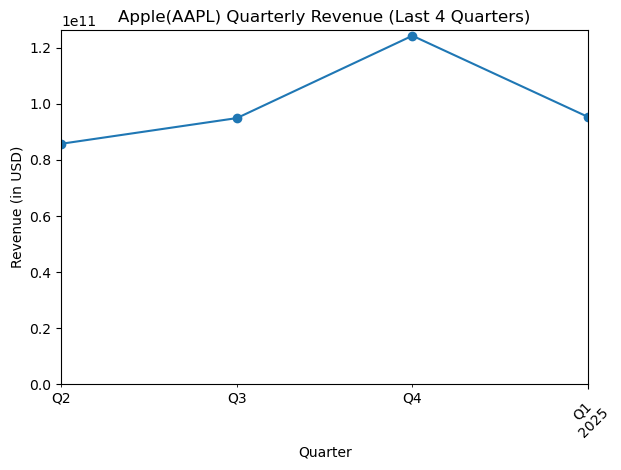

In [178]:
aapl_revenue.plot(kind= "line", marker = "o")
plt.title("Apple(AAPL) Quarterly Revenue (Last 4 Quarters)")
plt.xlabel("Quarter")
plt.ylabel("Revenue (in USD)")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.ylim(bottom = 0)
plt.show

<h1>Key Findings</h1>

As shown above, Apple (AAPL) had a steady increase in Q2 and Q3, a sharp increase in Q4, and a steep decrease in Q1 of 2025. This could be due to seasonal effects (e.g. holiday sales, new product announcements, etc.)



<h1>Apple vs Microsoft vs Google</h1>

In [219]:
msft = yf.Ticker("MSFT")
msft_revenue = msft.quarterly_financials.loc["Total Revenue"][:-1]

goog = yf.Ticker("GOOG")
goog_revenue = goog.quarterly_financials.loc["Total Revenue"][:-1]

In [221]:
combined = pd.DataFrame({
    "Apple": aapl_revenue,
    "Microsoft": msft_revenue,
    "Google": goog_revenue
})

combined = combined / 1e9
combined.index.name = "Quarter"
combined.columns.name = "Company"
combined.head()

Company,Apple,Microsoft,Google
Quarter,,,
2025-03-31,95.359,70.066,90.234
2024-12-31,124.300,69.632,96.469
2024-09-30,94.930,65.585,88.268
2024-06-30,85.777,64.727,84.742


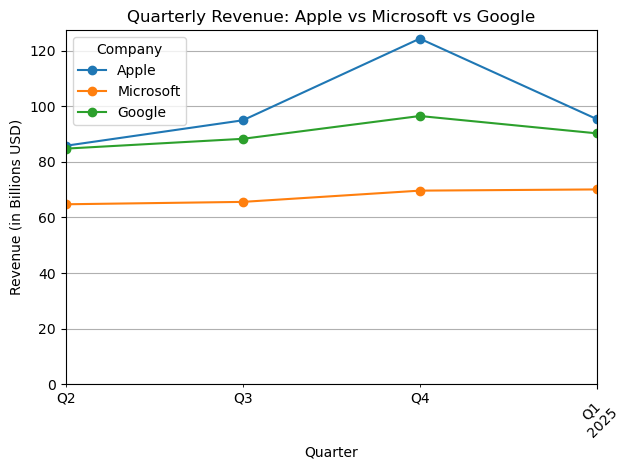

In [127]:
combined.plot(kind = "line", marker = "o")
plt.title("Quarterly Revenue: Apple vs Microsoft vs Google")
plt.ylabel("Revenue (in Billions USD)")
plt.xlabel("Quarter")
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.legend(title = "Company")
plt.ylim(bottom = 0)
plt.show()

<h1>Conclusion</h1>

Apple's quarterly revenue in Q2 was comparable to Google. However, in Q2 Microsoft's revenue was significantly lower (~20 billion). All companies revenue revenue increased in Q4, but Apple's revenue had a much larger increase compared to 

<h1>How Does "Fear vs Greed" Impact Apple Stock?</h1>

In [195]:
aapl = yf.Ticker("AAPL")
vxx = yf.Ticker("VXX")

aapl_hist = aapl.history(period = "5y")
vxx_hist = vxx.history(period = "5y")
df = pd.DataFrame({
    "AAPL_Close": aapl_hist["Close"],
    "VXX_Close": vxx_hist["Close"]
})
df.dropna(inplace=True)
df.head()

,AAPL_Close,VXX_Close
Date,,
2020-07-09 00:00:00-04:00,93.078041,2115.840088
2020-07-10 00:00:00-04:00,93.240875,2057.600098
2020-07-13 00:00:00-04:00,92.810722,2255.360107
2020-07-14 00:00:00-04:00,94.346596,2125.439941
2020-07-15 00:00:00-04:00,94.995445,2064.639893


In [197]:
df_norm = df / df.max() * 100

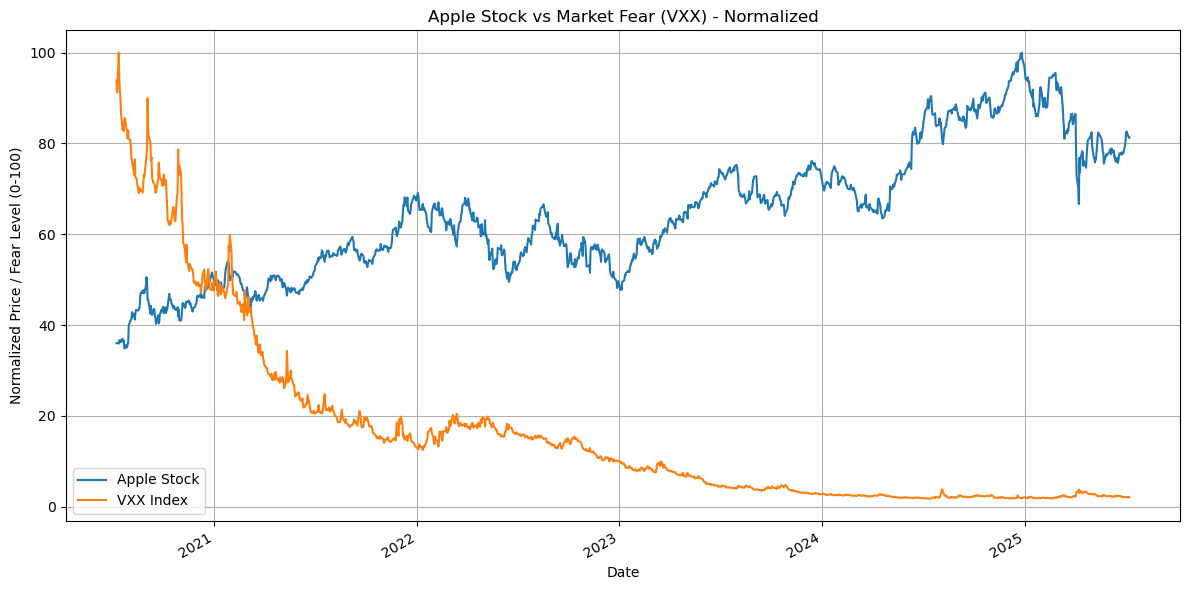

In [201]:
df_norm.plot(figsize = (12, 6))
plt.title("Apple Stock vs Market Fear (VXX) - Normalized")
plt.ylabel("Normalized Price / Fear Level (0-100)")
plt.xlabel("Date")
plt.grid(True)
plt.legend(["Apple Stock", "VXX Index"])
plt.tight_layout()
plt.show()

In [205]:
corr = df["AAPL_Close"].corr(df["VXX_Close"])
print(f"Correlation between Apple and VIX: {corr:.2f}")

Correlation between Apple and VIX: -0.75


<h1>Key Findings</h1>

- Apple stock and the VXX index shows a correlation of -0.75.
- As fear in the market spiked, Apple's stock price dropped.
- Large spikes in the VXX index (e.g. COVID pandemic in March 2020) aligns with a visible drop in Apple stock price.
- Shows principles like "loss aversion" and "herd panic" in the stock market.